In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch from torch.autograd import Variable
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

# WORKS CITED: 
* CHATGPT 4.0 USED FOR SOME WORK (Mostly with Graphing or calculation of OLS)

In [688]:
df = pd.read_csv('./data/train.csv')
print("Full train dataset shape is {}".format(df.shape))
df.head(90)

Full train dataset shape is (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000
86,87,60,RL,122.0,11911,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000


In [689]:
df = pd.read_csv('./data/test.csv')
print("Full train dataset shape is {}".format(df.shape))
df.head(90)

Full train dataset shape is (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1546,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
86,1547,50,RM,53.0,6360,Pave,NaN,Reg,Lvl,AllPub,...,148,0,NaN,NaN,NaN,0,3,2010,WD,Normal
87,1548,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
88,1549,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


# Continuous Features: ['LotArea', '1stFlrSF', 'GrLivArea']
# Categorical Features: ['MSZoning', 'Neighborhood', 'BldgType']

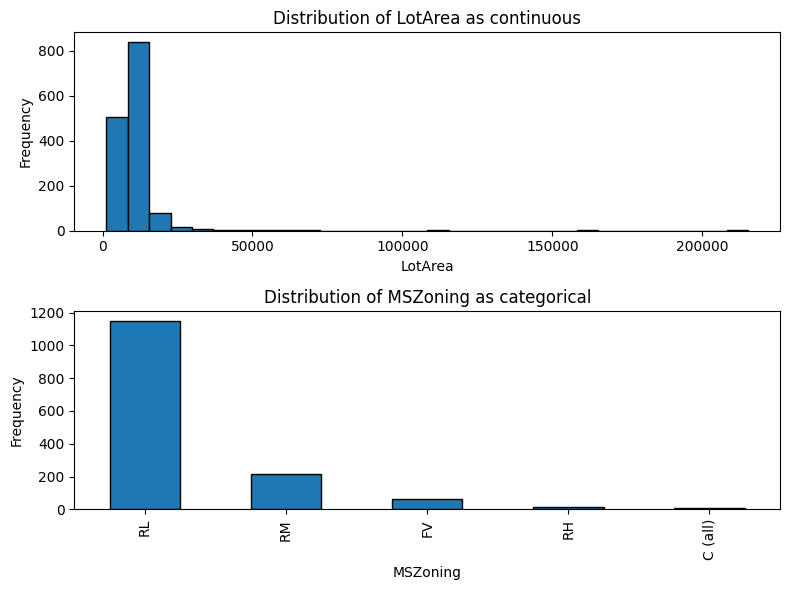

In [893]:
# Assuming df_train is your DataFrame
df = pd.read_csv('./data/train.csv')

# Continuous features
continuous_features = ['LotArea',]

# Categorical features 
categorical_features = ['MSZoning',]

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Flatten the axes array to easily iterate
flattened_axes = axes.flatten()

# Plot histograms for continuous features
for i, feature in enumerate(continuous_features):
    ax = flattened_axes[i]
    ax.hist(df[feature].dropna(), bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {feature} as continuous')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Plot bar charts for categorical features
for i, feature in enumerate(categorical_features):
    ax = flattened_axes[i + len(continuous_features)]
    df[feature].value_counts().plot(kind='bar', edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {feature} as categorical')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2.3 Pre-Process the data

I wanted to plot the distribution of Lot area before pre-processing to get a better understanding of what these features would look like visually before the data processing step.

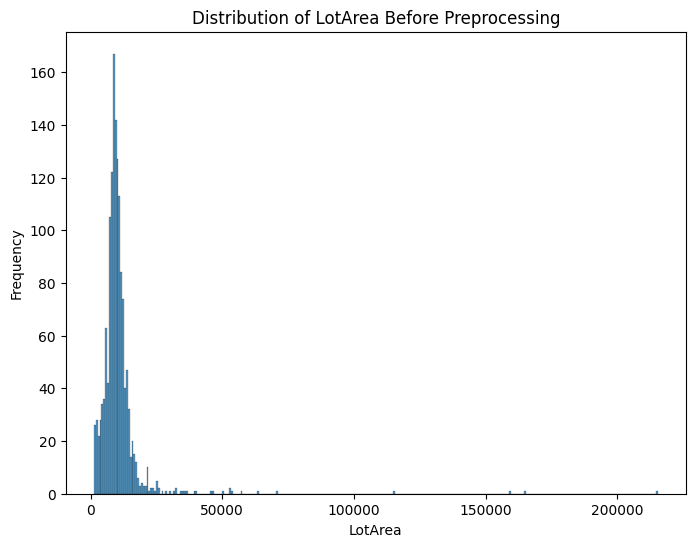

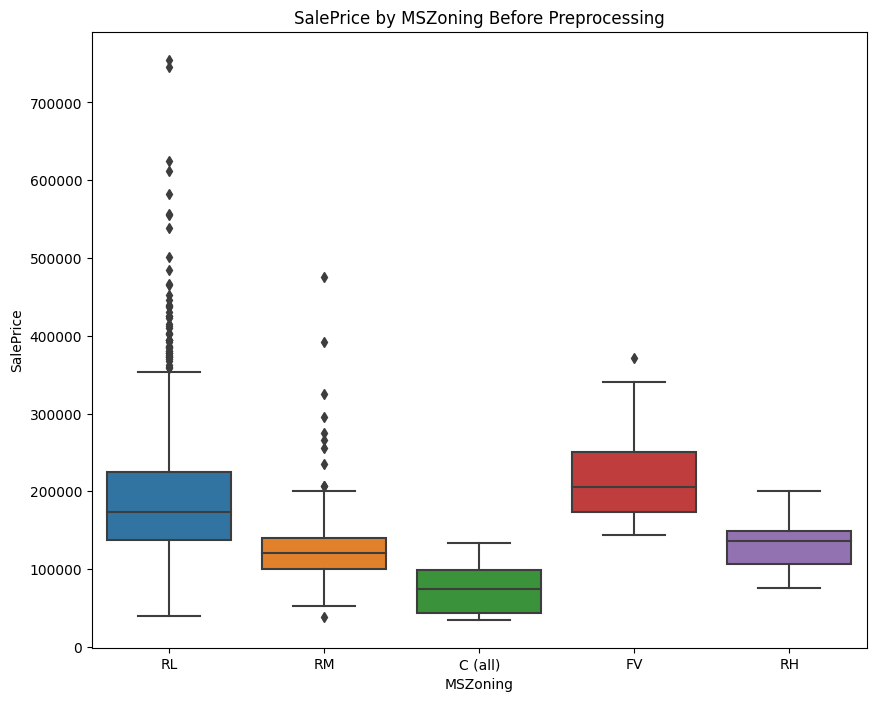

In [894]:
# BEFORE the pre-processing:

plt.figure(figsize=(8, 6))
sns.histplot(df['LotArea'], kde=False)
plt.title('Distribution of LotArea Before Preprocessing')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()

# Boxplot for a categorical column against a numerical column
plt.figure(figsize=(10, 8))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('SalePrice by MSZoning Before Preprocessing')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.show()

# Explaining pre-processing and hwy I took the steps:
In this script, we're essentially tidying up our dataset to set the stage for effective machine learning modeling. First, we load the raw training and testing data from CSV files, segregating features from the 'SalePrice' target variable. Next, we pinpoint the numerical columns and swiftly deal with any missing values by filling them with median values; this ensures our model doesn't trip over gaps in the data later on.

To smooth the path for our algorithm, we then normalize the numerical values, a vital step to prevent any single feature from dominating others, promoting a balanced input for the model. We’re also translating categorical data into a language that our model can understand, using label encoding. This step transforms textual data into numerical values, aligning them with the requirements of many machine learning algorithms.

Finally, we save our cleaned and structured data back into new CSV files, ready for the next steps in our data pipeline. This comprehensive cleanup act is akin to laying a solid foundation before building a house, ensuring that our machine learning model can operate at its peak performance and accuracy. It’s all about setting ourselves up for success in the upcoming modeling phase!

In [950]:
# Load the training and testing CSV file
training_df = pd.read_csv('./data/train.csv')
testing_df = pd.read_csv('./data/test.csv')

# List of all the features except 'SalePrice'
all_features = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 
    'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
    'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 
    'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 
    'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 
    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 
    'SaleType', 'SaleCondition'
]




# Identify numerical columns (excluding 'SalePrice' for the testing set)
numerical_cols = [col for col in all_features if training_df[col].dtype in ['int64', 'float64'] and col != 'SalePrice']

# Handling Missing Values and Outliers for the training set
for col in numerical_cols:
    median_val = training_df[col].median()
    training_df[col].fillna(median_val, inplace=True)
    # Optional: Implement outlier handling here

# Normalize Numerical Variables for Training (excluding 'SalePrice')
scaler_train = StandardScaler()
training_df[numerical_cols] = scaler_train.fit_transform(training_df[numerical_cols])

# Handling Missing Values and Outliers for the testing set
for col in numerical_cols:
    median_val = testing_df[col].median()
    testing_df[col].fillna(median_val, inplace=True)
    # Optional: Implement outlier handling here

# Normalize Numerical Variables for Testing
scaler_test = StandardScaler()
testing_df[numerical_cols] = scaler_test.fit_transform(testing_df[numerical_cols])

# Encode Categorical Variables for both training and testing
categorical_cols = list(set(all_features) - set(numerical_cols + ['Id', 'SalePrice']))
label_encoder = LabelEncoder()

for col in categorical_cols:
    data_to_encode = pd.concat([training_df[col], testing_df[col]]).astype(str)
    label_encoder.fit(data_to_encode)

    training_df.loc[:, col] = label_encoder.transform(training_df[col].astype(str))
    testing_df.loc[:, col] = label_encoder.transform(testing_df[col].astype(str))

# Save the pre-processed data back to new CSV files
training_df.to_csv('./data/pre-processed_training.csv', index=False)
testing_df.to_csv('./data/pre-processed_testing.csv', index=False)

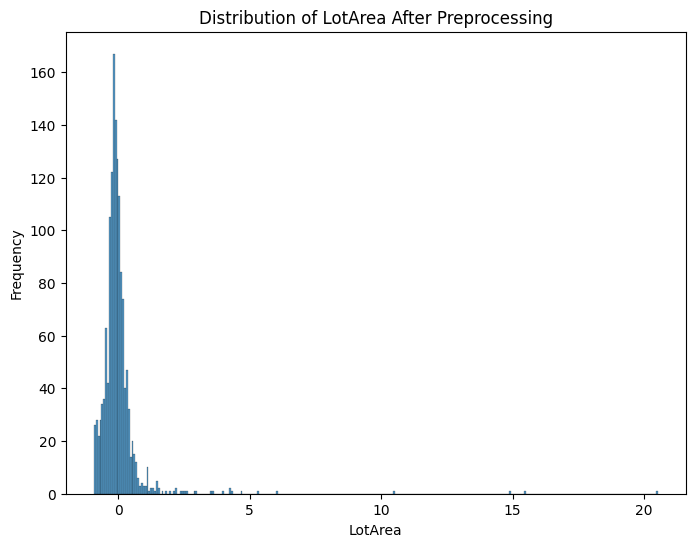

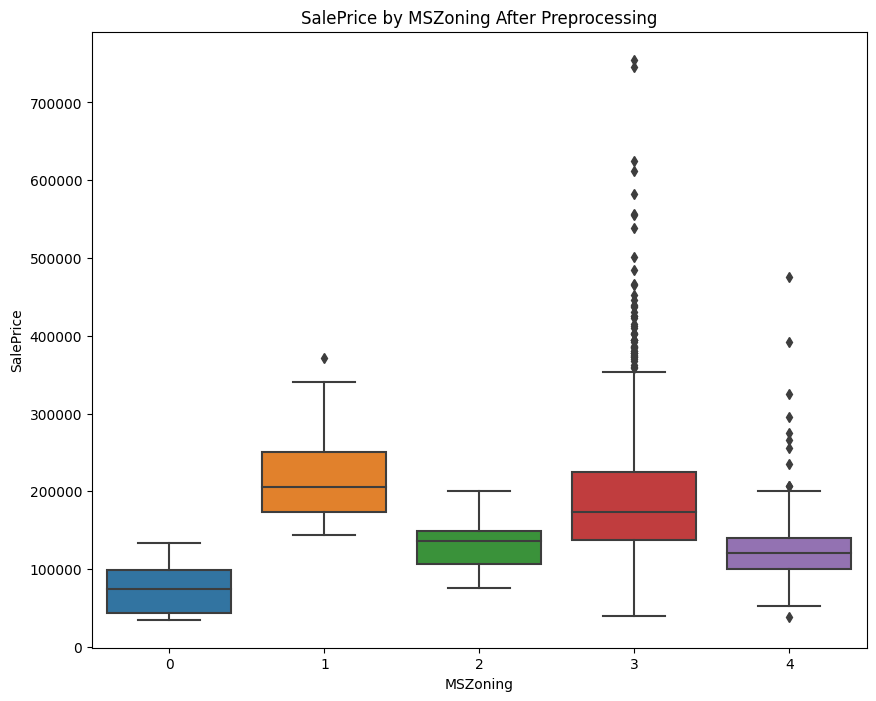

In [951]:
# Load the pre-processed training data
df_preprocessed = pd.read_csv('./data/pre-processed_training.csv')

# Histogram for a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(df_preprocessed['LotArea'], kde=False)
plt.title('Distribution of LotArea After Preprocessing')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()

# Boxplot for a categorical column against a numerical column
plt.figure(figsize=(10, 8))
sns.boxplot(x='MSZoning', y='SalePrice', data=df_preprocessed)
plt.title('SalePrice by MSZoning After Preprocessing')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.show()

# 2.4 One-Hot Encoding Code and Explanation

Often times we see that one-hot encoding is generally used for categorical variables that have no inherent order. For the dataset, we see that features like 
Street, Alley, LotConfig, Neighborhood, Condition1, BldgType, and GarageType can be good candidates for one-hot encoding. Sicne these features don't possess numerical orders but are categorical, which makes them suitable for one-hot encoding to avoid misleading the model, for this task, I've specifically selected Neighborhood.

<Figure size 800x400 with 0 Axes>

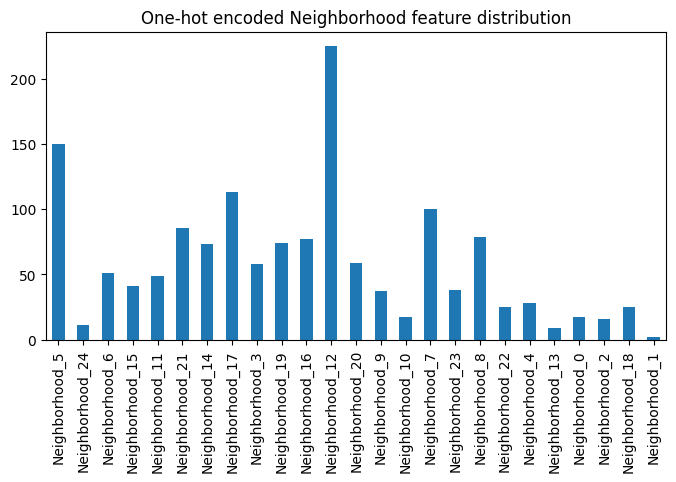

<Figure size 800x400 with 0 Axes>

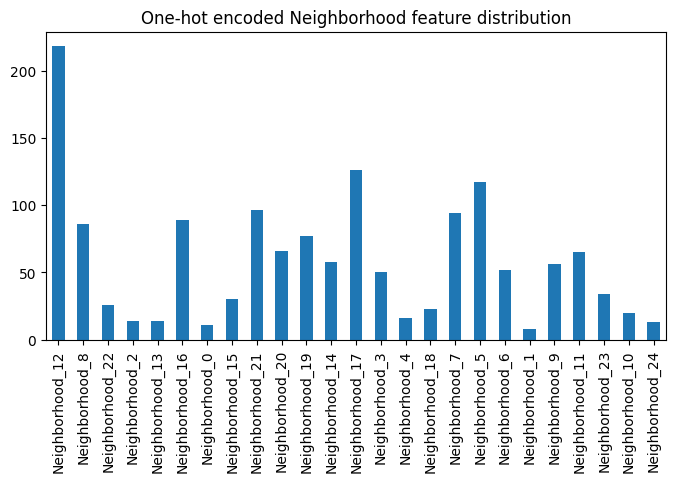

In [952]:
def one_hot_encode(df, feature):
    unique_values = df[feature].unique()
    for value in unique_values:
        df[f"{feature}_{value}"] = (df[feature] == value).astype(int)
    df.drop(columns=[feature], inplace=True) # Remove original feature column
    return df

def plot_feature_distribution(df, feature, prefix):
    # Original feature histogram
    plt.figure(figsize=(8,4))
    if feature in df.columns:
        df[feature].value_counts().plot(kind='bar')
        plt.title(f'Original {feature} feature distribution')
        plt.savefig(f'./graphs/{prefix}_original_feature_distribution_2.4.jpeg')

    # One-hot encoded feature histogram
    one_hot_features = [col for col in df.columns if col.startswith(f'{feature}_')]
    if one_hot_features:
        plt.figure(figsize=(8, 4))
        df[one_hot_features].sum().plot(kind='bar')
        plt.title(f'One-hot encoded {feature} feature distribution')
        plt.savefig(f'./graphs/{prefix}_one_hot_encoded_feature_distribution_2.4.jpeg')

# Load data and apply function
training_df = pd.read_csv('./data/pre-processed_training.csv')
testing_df = pd.read_csv('./data/pre-processed_testing.csv')

feature_to_encode = 'Neighborhood'
training_df = one_hot_encode(training_df, feature_to_encode)
plot_feature_distribution(training_df, feature_to_encode, 'training')

testing_df = one_hot_encode(testing_df, feature_to_encode)
plot_feature_distribution(testing_df, feature_to_encode, 'testing')

# Save the pre-processed data back to new CSV files
training_df.to_csv('./data/pre-processed_training.csv', index=False)
testing_df.to_csv('./data/pre-processed_testing.csv', index=False)

# My own personal Pre-Work for 2.5 to determine best features to use to train

In [953]:
correlation_matrix = pd.DataFrame(index=numerical_cols, columns=['Coefficient', 'P-value'])

for col in numerical_cols:
    correlation, p_value = stats.pearsonr(df[col], df['SalePrice'])
    correlation_matrix.loc[col] = [correlation, p_value]

# You can now print or save correlation_matrix which contains correlation coefficients and p-values
print(correlation_matrix)

              Coefficient   P-value
MSSubClass      -0.084284  0.001266
LotFrontage      0.334771       0.0
LotArea          0.263843       0.0
OverallQual      0.790982       0.0
OverallCond     -0.077856  0.002912
YearBuilt        0.522897       0.0
YearRemodAdd     0.507101       0.0
MasVnrArea       0.472614       0.0
BsmtFinSF1        0.38642       0.0
BsmtFinSF2      -0.011378  0.663999
BsmtUnfSF        0.214479       0.0
TotalBsmtSF      0.613581       0.0
1stFlrSF         0.605852       0.0
2ndFlrSF         0.319334       0.0
LowQualFinSF    -0.025606  0.328207
GrLivArea        0.708624       0.0
BsmtFullBath     0.227122       0.0
BsmtHalfBath    -0.016844  0.520154
FullBath         0.560664       0.0
HalfBath         0.284108       0.0
BedroomAbvGr     0.168213       0.0
KitchenAbvGr    -0.135907       0.0
TotRmsAbvGrd     0.533723       0.0
Fireplaces       0.466929       0.0
GarageYrBlt      0.466754       0.0
GarageCars       0.640409       0.0
GarageArea       0.623431   

# 2.5 Using ordinary least squares (OLS) try to predict house prices on train.csv.

The output for both the MSE and R2. MSE: 1074530172.1743705R2 Score: 0.8296232452328417


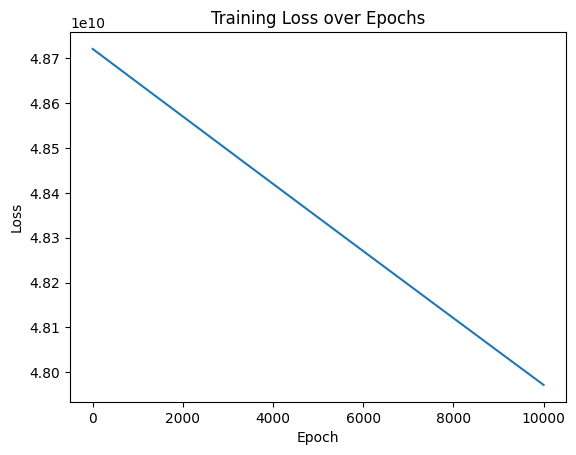

In [954]:
# Load Data
df_train = pd.read_csv('./data/pre-processed_training.csv')

# Extract the 'SalePrice' column from training data as our target variable
y_train = df_train['SalePrice']
X_train = df_train.drop('SalePrice', axis=1)

# Feature Selection based on top features
selected_features = ['LotArea','LotShape','HeatingQC','OverallQual', 'OverallCond', 'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'GarageCars', 'MSZoning', 'Heating', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt']

# selected_features = ['LotArea','LotShape','HeatingQC','OverallQual', 'OverallCond', 'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'GarageCars', 'MSZoning', "Heating"]
# selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'Foundation']
# selected_features = ['BsmtQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'HeatingQC', 'BsmtExposure', 'MasVnrType', 'LotShape', 'MSZoning', 'KitchenAbvGr', 'EnclosedPorch', 'PoolQC', 'BsmtFinType1', 'Heating']
# Reduce the training data to selected features
X_train_selected = X_train[selected_features]

# Train the model (Sklearn LinearRegression)
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

# Make predictions on the training set
y_train_pred = lr.predict(X_train_selected)

# Evaluate the model
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"The output for both the MSE and R2. MSE: {mse}" + f"R2 Score: {r2}")

# Plot the loss values
plt.figure()
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


# Checking the process....
* Checks to make sure that there are no NaN in the y_pred and y_train.

In [955]:
# Assuming y_train is already defined
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# Now you can check for NaN values
print("Any NaN in y_train:", torch.isnan(y_train_tensor).any())
print("Any NaN in y_pred:", np.isnan(y_pred.detach().numpy()).any())


Any NaN in y_train: tensor(False)
Any NaN in y_pred: False


Loads the data, and select the features + targets that we found in the prework for 2.5

Graphs out the correlation heatmap and histogram to give us an idea of relationship/data.

Text(0, 0.5, 'Frequency')

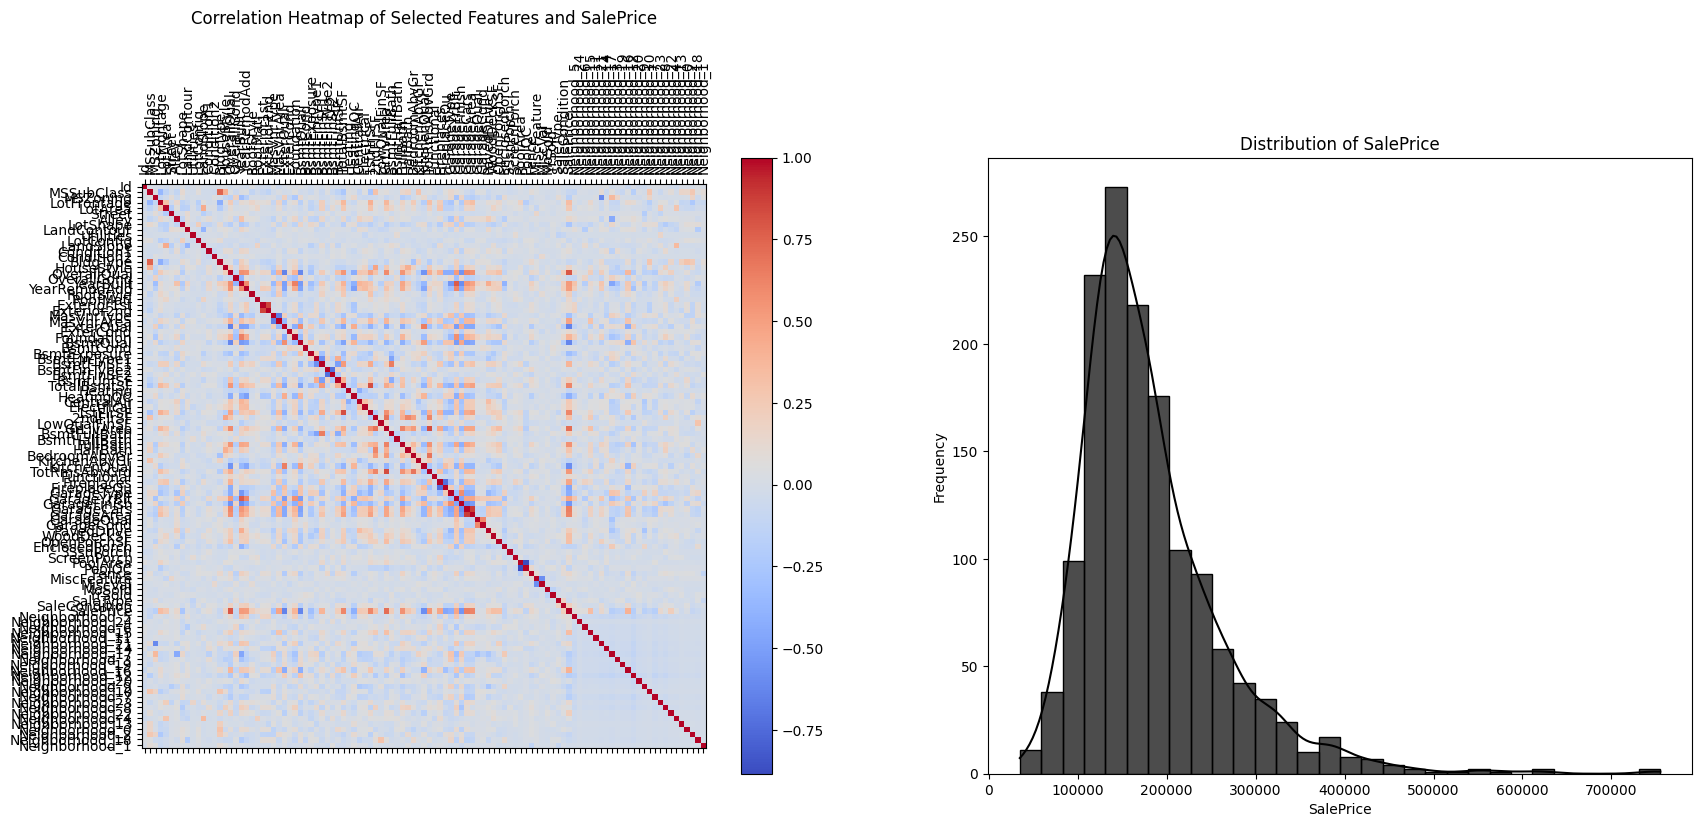

In [956]:
# Assuming df_train is your DataFrame
correlation_matrix = df_train.select_dtypes(include=[np.number]).corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Correlation Heatmap
ax1 = axes[0]
cax = ax1.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax, ax=ax1)
ax1.set_xticks(np.arange(len(correlation_matrix.columns)))
ax1.set_yticks(np.arange(len(correlation_matrix.columns)))
ax1.set_xticklabels(correlation_matrix.columns, rotation=90)
ax1.set_yticklabels(correlation_matrix.columns)
ax1.set_title('Correlation Heatmap of Selected Features and SalePrice', pad=20)

# Histogram
ax2 = axes[1]
sns.histplot(df_train['SalePrice'], bins=30, color='black', alpha=0.7, kde=True)
ax2.set_title('Distribution of SalePrice')
ax2.set_xlabel('SalePrice')
ax2.set_ylabel('Frequency')

More graphs to provide us an understanding, this time each of the "optimal" features are graphed via scatter plot of feature vs saleprice to understand the relation, and we put a linear fit to better understand this relation.

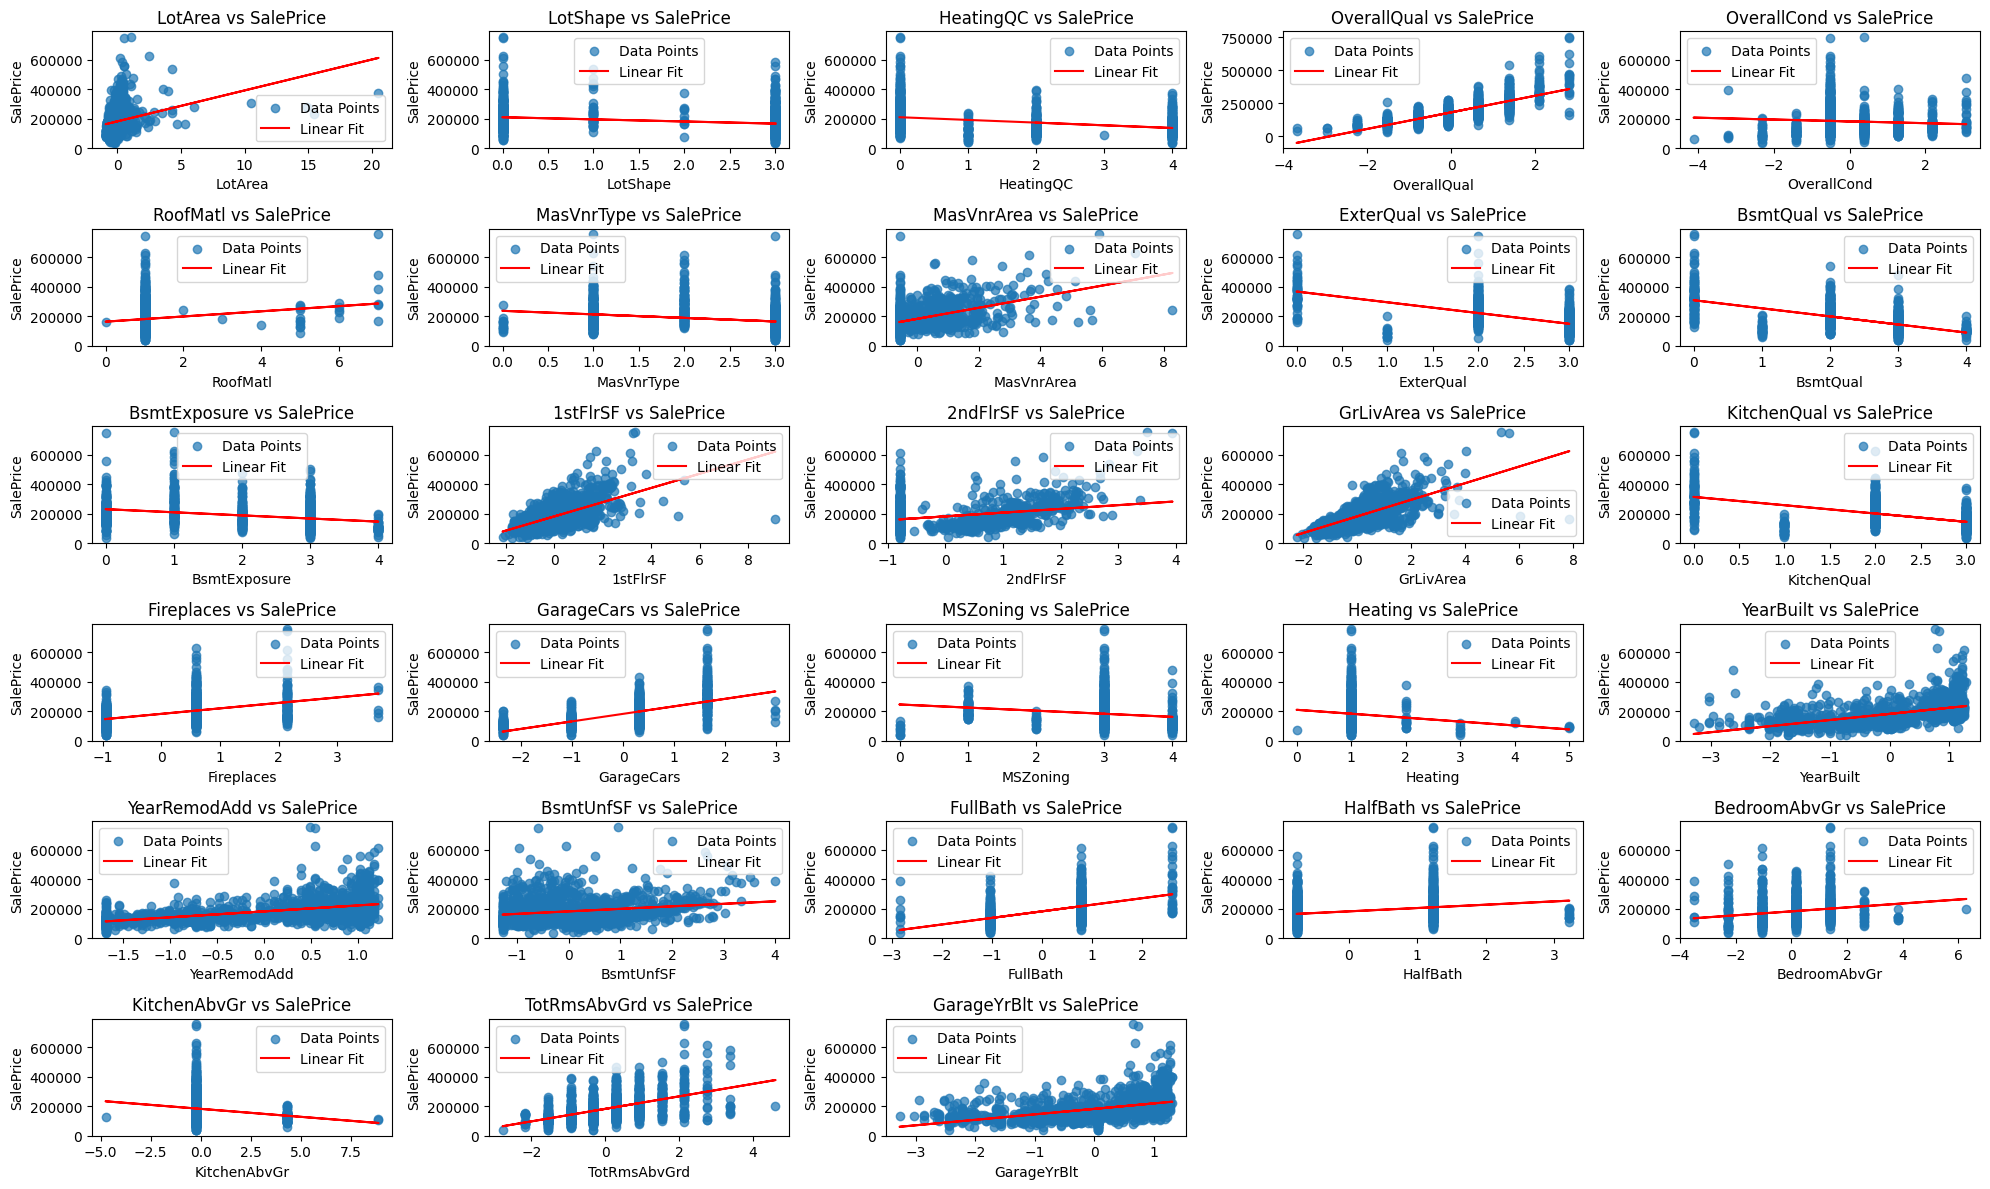

In [957]:
N = len(selected_features)
cols = 5
rows = int(np.ceil(N / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
axes = axes.ravel()

# Loop through each feature and plot it
for i, feature in enumerate(selected_features):
    ax = axes[i]
    
    # Scatter Plot
    ax.scatter(df_train[feature], df_train['SalePrice'], alpha=0.7, label='Data Points')
    
    # Add Linear Fit
    if df_train[feature].dtype != 'object':  # check if the feature is numeric
        m, b = np.polyfit(df_train[feature], df_train['SalePrice'], 1)
        ax.plot(df_train[feature], m * df_train[feature] + b, color='red', label='Linear Fit')
    
    ax.set_title(f'{feature} vs SalePrice')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
    ax.legend()

# If there are any remaining empty subplots, remove them
for i in range(N, rows*cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('./graphs/scatter_plots_2.5.jpeg')
plt.show()

Epoch 0, Loss: 1045463552.0
Epoch 1, Loss: 1045463482.6666666
Epoch 2, Loss: 1045463480.0
Epoch 3, Loss: 1045463466.6666666
Epoch 4, Loss: 1045463538.6666666
Epoch 5, Loss: 1045463474.6666666
Epoch 6, Loss: 1045463434.6666666
Epoch 7, Loss: 1045463416.0
Epoch 8, Loss: 1045463368.0
Epoch 9, Loss: 1045463349.3333334
Epoch 10, Loss: 1045463362.6666666
Epoch 11, Loss: 1045463368.0
Epoch 12, Loss: 1045463346.6666666
Epoch 13, Loss: 1045463354.6666666
Epoch 14, Loss: 1045463362.6666666
Epoch 15, Loss: 1045463394.6666666
Epoch 16, Loss: 1045463381.3333334
Epoch 17, Loss: 1045463384.0
Epoch 18, Loss: 1045463408.0
Epoch 19, Loss: 1045463450.6666666
Epoch 20, Loss: 1045463413.3333334
Epoch 21, Loss: 1045463392.0
Epoch 22, Loss: 1045463392.0
Epoch 23, Loss: 1045463394.6666666
Epoch 24, Loss: 1045463408.0
Epoch 25, Loss: 1045463392.0
Epoch 26, Loss: 1045463397.3333334
Epoch 27, Loss: 1045463384.0
Epoch 28, Loss: 1045463469.3333334
Epoch 29, Loss: 1045463421.3333334
Epoch 30, Loss: 1045463378.66666

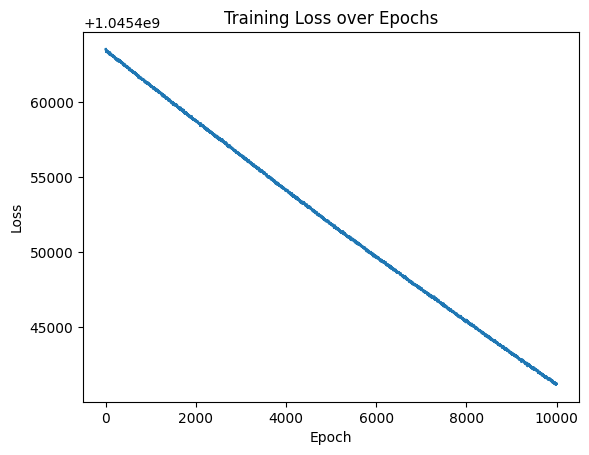

In [959]:
# Load the dataset
df_train = pd.read_csv('./data/pre-processed_training.csv')

# Select specific features
# Prepare the data
X_train = df_train[selected_features].values.astype(np.float32)
y_train = df_train["SalePrice"].values.astype(np.float32)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Autograd for OLS
X = Variable(X_train_tensor, requires_grad=True)
y = Variable(y_train_tensor, requires_grad=True)

# Add a bias term
X_bias = torch.cat([X, torch.ones(X.shape[0], 1)], 1)

# OLS formula: (X'X)^-1 * X' * y
XTX_inv = torch.inverse(torch.matmul(X_bias.T, X_bias))
XTy = torch.matmul(X_bias.T, y)
ols_solution = torch.matmul(XTX_inv, XTy)

# Model definition
class LinearRegressionModel:
    def __init__(self, init_weights):
        self.weights = Variable(init_weights[:-1].view(-1, 1), requires_grad=True)
        self.bias = Variable(init_weights[-1:], requires_grad=True)

    def forward(self, x):
        return torch.mm(x, self.weights) + self.bias

# Initialize model
model = LinearRegressionModel(ols_solution.detach().view(-1))

# Manually define the ols loss function
def OLS_Loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

# Define optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam([model.weights, model.bias], lr=learning_rate)

# Training loop
batch_size = 128
num_batches = int(np.ceil(X_train_tensor.shape[0] / batch_size))

# Training loop
num_epochs = 10000
loss_values = []

for epoch in range(num_epochs):
    total_loss = 0
    
    for batch_idx in range(num_batches):
        # Get batch of data
        start_idx = batch_idx * batch_size
        end_idx = start_idx + batch_size
        X_batch = X[start_idx:end_idx]
        y_batch = y[start_idx:end_idx]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model.forward(X_batch)
        
        # Compute loss
        loss = OLS_Loss(y_pred, y_batch)

        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        total_loss += loss.item()
    
    epoch_loss = total_loss / num_batches
    loss_values.append(epoch_loss)
    
    if epoch % 1 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss}')

# Evaluate the model on the training set
with torch.no_grad():
    y_pred_train = model.forward(X)

# Compute metrics on the training set
mse_train = mean_squared_error(y_train, y_pred_train.numpy())
r2_train = r2_score(y_train, y_pred_train.numpy())

print(f"Training set MSE: {mse_train}")
print(f"Training set R2 Score: {r2_train}")


# Plot the loss values
plt.figure()
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


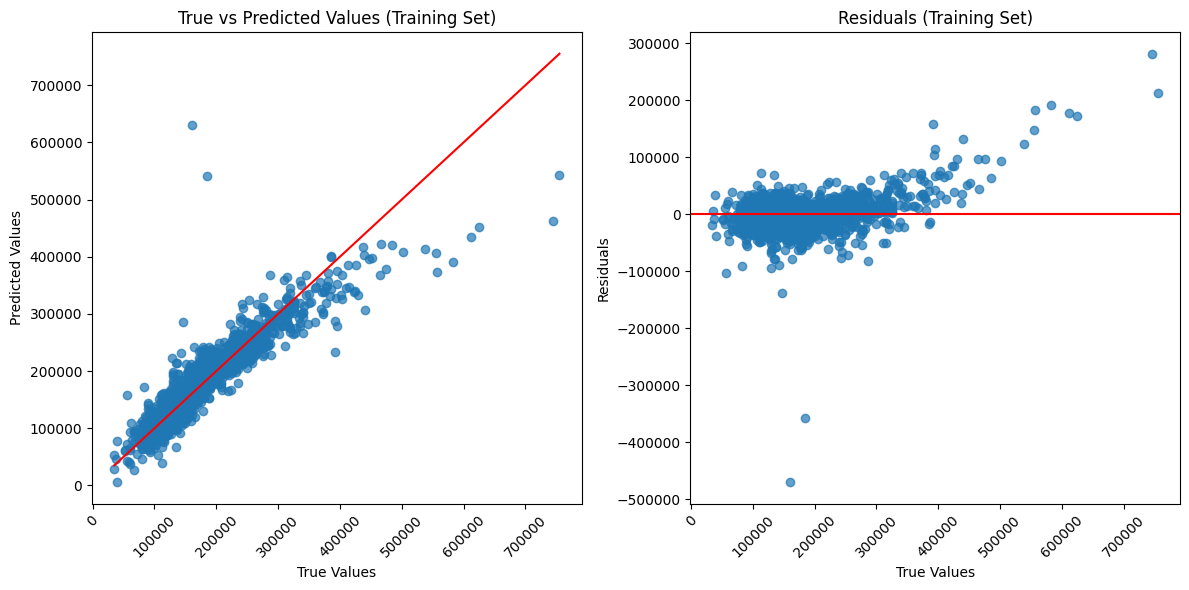

In [960]:
y_pred_train_np = y_pred_train.numpy().reshape(-1)

# Plot true vs predicted values for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_np, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Training Set)')
plt.xticks(rotation=45)  # Rotate the x-tick labels to avoid overlap

# Plot residuals for training set
plt.subplot(1, 2, 2)
residuals_train = y_train - y_pred_train_np
plt.scatter(y_train, residuals_train, alpha=0.7)
plt.axhline(y=0, color='red')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals (Training Set)')
plt.xticks(rotation=45)  # Rotate the x-tick labels to avoid overlap

# Show plots
plt.tight_layout()
plt.savefig('./graphs/TrueVsPredicted_2.5.jpeg')

plt.show()


# 2.6 Comparing result of Autograd vs OLS without autograd.



## The output for OLS without autograd:
* MSE: 1074530172.174371R2 
* R2 Score: 0.8296232452328417

## Values for Autograd with OLS: 
* Training set MSE: 1074554880.0
* Training set R2 Score: 0.8296193379973635

## Discussion:

In comparing the Autograd OLS and the No Autograd OLS outcomes, it is evident that both models yield very comparable results, with negligible differences in the MSE and R² scores. This implies that both approaches are adept at optimizing the weights to achieve a similar performance, suggesting a consistency in the baseline efficiency of both methods.

However, the true potential of utilizing gradient descent, facilitated by Autograd, comes to the fore in specific scenarios. Firstly, when dealing with large datasets - for instance, in the realm of big data analytics where datasets can range in the order of terabytes or more - computing gradients manually, as done in OLS without Autograd, can become exceedingly computationally intensive and prone to errors. In such scenarios, the Autograd function can streamline the process by automatically and efficiently computing gradients, thereby speeding up the optimization process significantly.

Furthermore, when the model complexity escalates, perhaps in applications like deep learning where models have a high number of parameters, Autograd can facilitate the handling of more intricate models with higher dimensions. This can be particularly beneficial in fields such as image recognition or natural language processing where complex models are a norm.

Moreover, the dynamic nature of gradient descent becomes an asset when the model needs to be updated frequently with new data. For example, in the financial sector where predictive models are continually being fed new market data, gradient descent allows for incremental learning. This means that the model can adapt with each new batch of data without undergoing a complete retraining, thus conserving computational resources and time. This incremental learning can be a cornerstone in environments like high-frequency trading where models need to be adapted swiftly to remain competitive.

Therefore, in circumstances demanding the handling of large datasets, managing complex models, or necessitating continual adaptation to new data, utilizing gradient descent through tools like Autograd stands as a more suitable and efficient choice. Its ability to efficiently navigate the complexity and scale of modern data applications makes it a potent tool in the toolkit of data scientists and analysts.


# 2.7 Train the Model 

## (Since I've already trained the model within 2.5 using OLS (Autograd) I will not (copy + paste it here) instead, what I do here is test against the pre-processed_testing.csv and output the results to a csv file.) Furthermore I also create the scatter plot of the index vs predicted value, as well as the index vs the true values to understand how my predicted value aligns with the (true value) in this case for this comparison (training)

tensor([[109746.7344],
        [154654.1406],
        [176352.1875],
        ...,
        [169370.5625],
        [118970.7734],
        [231615.6250]])


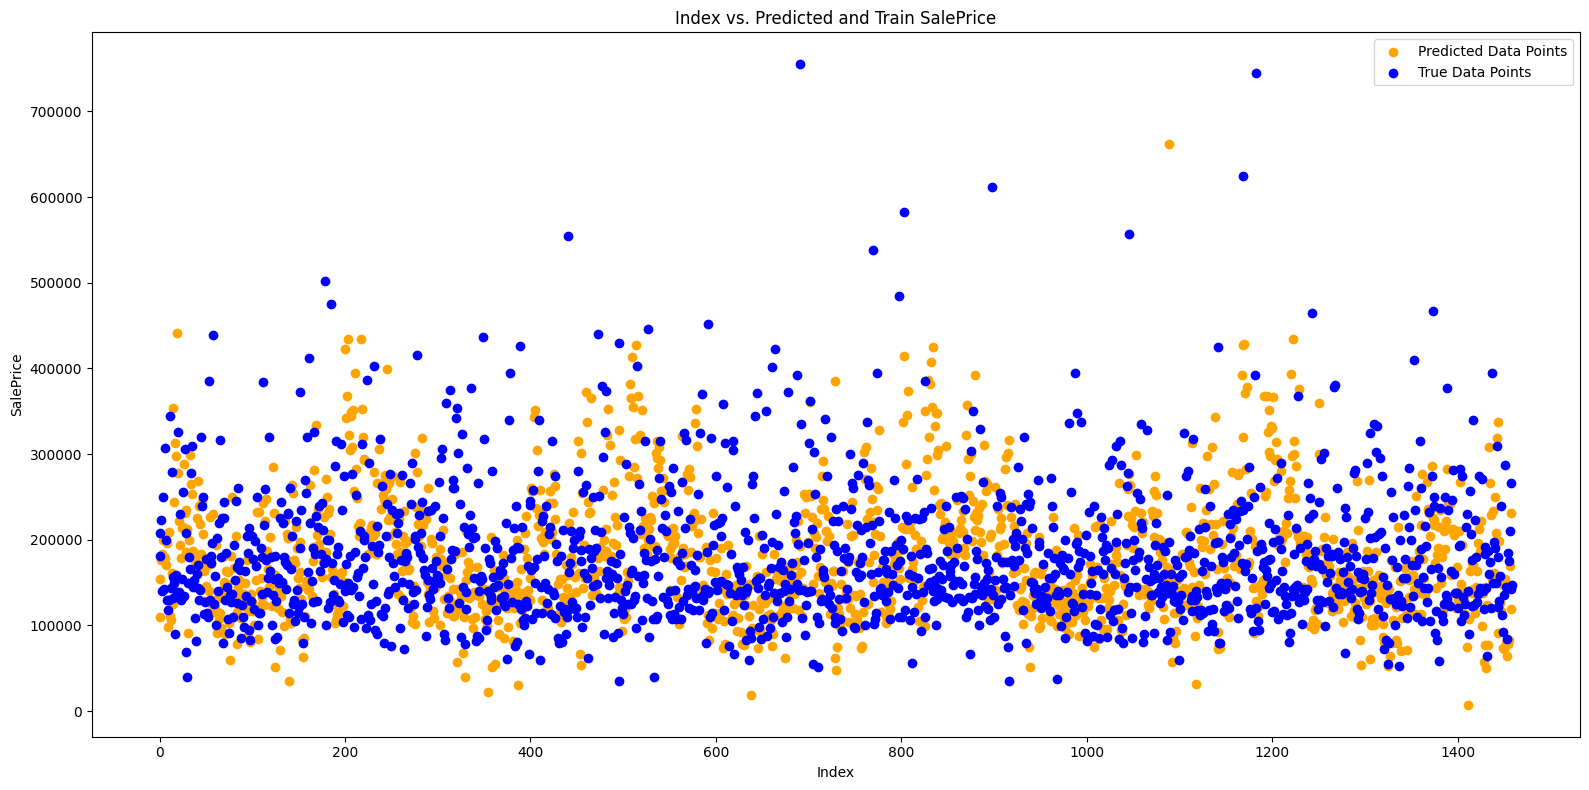

In [961]:
# Correct the data path to load the test data instead of the training data
df_test = pd.read_csv('./data/pre-processed_testing.csv')

# Load the true values from 'predicted_sale_prices.csv'
df_true_values = pd.read_csv('./data/pre-processed_training.csv')

# Prepare the test data (using the same selected features)
X_test = df_test[selected_features].values.astype(np.float32)

# Convert to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Make predictions on the test data
with torch.no_grad():
    y_pred_test = model.forward(X_test_tensor)

# y_pred_test now contains the predictions for the test set
print(y_pred_test)

# Set up a 1x1 grid of subplots
fig, ax1 = plt.subplots(1, figsize=(16, 8))

# Scatter plot of index vs predicted values
ax1.scatter(range(len(y_pred_test)), y_pred_test.numpy().flatten(), color='orange', label='Predicted Data Points')

# Scatter plot of index vs true values
ax1.scatter(range(len(df_true_values)), df_true_values['SalePrice'], color='blue', label='True Data Points')

ax1.set_xlabel("Index")
ax1.set_ylabel("SalePrice")
ax1.set_title("Index vs. Predicted and Train SalePrice")
ax1.legend()

plt.tight_layout()
plt.show()

# 2.7 (Image Submission) onto kaggle

<image src='./graphs/Kaggle.png'>

In [962]:
# Assuming testing_df is df_test and it has an 'Id' column
if 'Id' in df_test.columns:
    predicted_df = pd.DataFrame()
    predicted_df['Id'] = df_test['Id']
    predicted_df['SalePrice'] = y_pred_test.numpy().flatten()

    # Write to CSV
    predicted_df.to_csv('./data/predicted_sale_prices.csv', index=False)
else:
    print("The 'Id' column is not present in the testing dataframe.")